References Used:




*   https://colab.research.google.com/drive/1L_IMo6v0a0ALK8nefZm6PqPSy0vZIWBT#scrollTo=hyyN-2qyK_T2
*   https://colab.research.google.com/drive/16gZuQlwxmxR5ZWYLZvBeq3bTdFfb1r_6



In [52]:
# Installing all the libraries required to implement the code
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install xvfb
!apt-get update && apt-get install cmake libopenmpi-dev python3-dev zlib1g-dev
!pip install stable-baselines
!apt-get install -y python-numpy python-dev cmake zlib1g-dev libjpeg-dev xvfb xorg-dev python-opengl libboost-all-dev libsdl2-dev swig

!pip install pyvirtualdisplay
!pip install gym
!pip install "gym[atari]"
!pip install piglet

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.2).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 74.6 kB in 2s (36.2 kB/s)
Reading package lists

In [0]:
# Importing all the libraries required to implement the code
import os
import gym
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display as ipythondisplay 
from pyvirtualdisplay import Display
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.policies import MlpPolicy, LnMlpPolicy, CnnPolicy
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines import DQN  # Stable baselines DQN implementation

In [0]:
# The Callback() function is used to calculate all the metric after every few timesteps of the models training phase.
# These metrics include time spent on training, mean reward after every 100 episodes, etc.
best_mean_reward, n_steps = -np.inf, 0

def callback(_locals, _globals):
    """
    Callback called at each step (for DQN an others) or after n steps (see ACER or PPO2)
    :param _locals: (dict)
    :param _globals: (dict)
    """
    global n_steps, best_mean_reward
    # Print stats every 1000 calls
    if (n_steps + 1) % 1000 == 0:
        # Evaluate policy performance
        x, y = ts2xy(load_results(log_dir), 'timesteps')
        if len(x) > 0:
            mean_reward = np.mean(y[-100:])
            #print(x[-1], 'timesteps')
            #print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(best_mean_reward, mean_reward))

            # New best model, you could save the agent here
            if mean_reward > best_mean_reward:
                best_mean_reward = mean_reward
                # Example for saving best model
                #print("Saving new best model at %d"%x[-1])
                #_locals['self'].save('deepq_MountainCar-v0')
    n_steps += 1
    return True

In [59]:
# This section is used to start the virtual display to display the output inside the plot in the browser
display = Display(visible=0, size=(400, 300))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1035'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1035'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [74]:
# Create log dir
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)

env = gym.make('IceHockey-ram-v0')
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

#prev_screen = env.render(mode='rgb_array')
#plt.imshow(prev_screen)

model = DQN(MlpPolicy, env, verbose=1)

start_time = time.time()
model.learn(total_timesteps=100000, callback=callback) # Number of timesteps is 50000
elapsed_time = time.time() - start_time

print("Time taken: %d s"%elapsed_time)

model.save("Bonus2")
del model # Removing the model and resetting it to demonstrate saving and loading


/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


Time taken: 973 s


In [0]:
# movingAverage() function is used to generate smooth output values for plotting the reward graph. 
def movingAverage(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')

# plot_results() is used to plot the graph of Rewards Vs Number of Timesteps based on the logs time.
def plot_results(log_folder, title='Learning Curve'):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), 'timesteps')
   

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Rewards')
    plt.title(title + " Smoothed")
    plt.show()

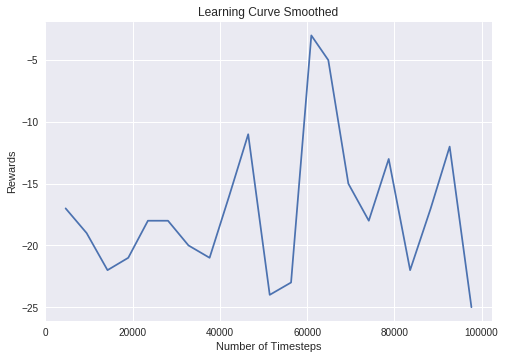

In [76]:
# Here we display the graph.
plot_results(log_dir)

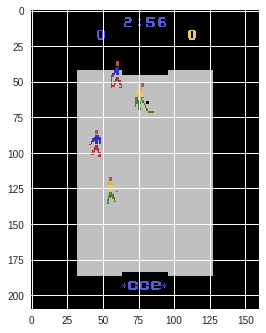

In [77]:
# Here the model is loaded again from a pickel time and agent starts to predict the values based on the training obtained in the training phase.
model = DQN.load("Bonus2")
obs = env.reset()

for i in range(100):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    screen = env.render(mode='rgb_array')
  
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

    
ipythondisplay.clear_output(wait=True)
env.close()

In [0]:
#Here we have to stop the virtual display from animating the output.
display.stop()